### R6 - NeuralNetwork and Deep Learning : Project 2 - The Street View House Numbers (SVHN) Dataset

Data Set Reference: https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing 

####In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

####SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

##### import numpy and pandas library

In [0]:
import numpy as np
import pandas as pd

#####calculating the accuracy measures and confusion matrix:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve

#####Importing ploting libraries:

In [0]:

import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

#####Importing Tensorflow and Keras libraries:

In [4]:
import h5py
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
import warnings 
warnings.filterwarnings('ignore')

### Questions :

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
h5FilePath="/content/drive/My Drive/AIML/8thResidency/ExternalLab/SVHN_single_grey1.h5"

####1. Reading the dataset: Reading SVHN data from h5 file.

In [0]:
svhn_h5f = h5py.File(h5FilePath,"r")

####Getting Keys from h5py object:

In [9]:
keys=svhn_h5f.keys()
for key in keys:
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


####Getting Train, Test and validation data along with Label:

In [0]:
X_train=svhn_h5f['X_train'][:]
y_train=svhn_h5f['y_train'][:]

X_test=svhn_h5f['X_test'][:]
y_test=svhn_h5f['y_test'][:]

X_val=svhn_h5f['X_val'][:]
y_val=svhn_h5f['y_val'][:]

#####Getting Train Y label unique value:

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#####Get Test Y label unique value:

In [12]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

####Closing h5 file:

In [0]:
svhn_h5f.close()

####Verifying size of Training, Validation and Test sets: 

In [15]:
print("Training Set",X_train.shape, y_train.shape )
print("Validation Set",X_val.shape, y_val.shape )
print("Test Set",X_test.shape, y_test.shape )

Training Set (42000, 32, 32) (42000,)
Validation Set (60000, 32, 32) (60000,)
Test Set (18000, 32, 32) (18000,)


#####Visualize first 10 train data with label:

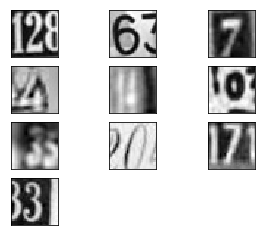

label for each of the above image:
 [2, 6, 7, 4, 4, 0, 3, 0, 7, 3]


In [16]:
labels = []

plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    lbl=y_train[i]
    labels.append(lbl)
plt.show()
print("label for each of the above image:\n", labels)

#### 2. Converting train, test and validation data labels to one hot vectors

#####No. of unique Label in the dataset (From 1 to 10)

In [0]:
num_classes = 10 
# Converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [19]:
print(y_train.shape)
print('First 5 examples now are: \n', y_train[0:5])

(42000, 10)
First 5 examples now are: 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### 3. Normalizing the Train, Test and Validation image data from 0-255 to 0-1

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

#### 4. Reshaping the data from 32x32 to 32x32x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
X_val = X_val.reshape((X_val.shape[0], 32, 32, 1))

In [22]:
print("Training Set",X_train.shape )
print("Validation Set",X_val.shape )
print("Test Set",X_test.shape )

Training Set (42000, 32, 32, 1)
Validation Set (60000, 32, 32, 1)
Test Set (18000, 32, 32, 1)


#### 5. Build Model
####Initializing model1:

In [0]:

model1 = tf.keras.models.Sequential()

In [24]:
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 1)))
model1.add(tf.keras.layers.Flatten())
#Adding - Dense Layer - 128 Nurons with Relu
model1.add(tf.keras.layers.Dense(128, activation='relu'))
#Adding - Dense Layer/output layer - 10 Nurons with Softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


####compiling model:

In [0]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#Fitting the model1 with 10 epochs and batch size 32 for train and validation data
m1_history=model1.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 2.2515 - acc: 0.1943 - val_loss: 2.0296 - val_acc: 0.4045
Epoch 2/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 1.5338 - acc: 0.5264 - val_loss: 1.2084 - val_acc: 0.6414
Epoch 3/10
42000/42000 [==============================] - 65s 2ms/sample - loss: 1.1598 - acc: 0.6463 - val_loss: 1.0300 - val_acc: 0.6955
Epoch 4/10
42000/42000 [==============================] - 65s 2ms/sample - loss: 1.0316 - acc: 0.6864 - val_loss: 1.0454 - val_acc: 0.6752
Epoch 5/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.9521 - acc: 0.7138 - val_loss: 1.0941 - val_acc: 0.6787
Epoch 6/10
42000/42000 [==============================] - 66s 2ms/sample - loss: 0.8897 - acc: 0.7310 - val_loss: 0.9771 - val_acc: 0.7021
Epoch 7/10
42000/42000 [==============================] - 65s 2ms/sample - loss: 0.8408 - acc: 0.7466 - val_loss: 0.

In [27]:
#listing all data in history
print(m1_history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


#### Ploting Model1 Fit output for Train & Validation Data

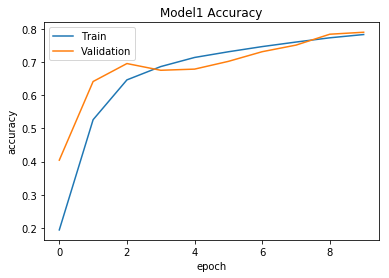

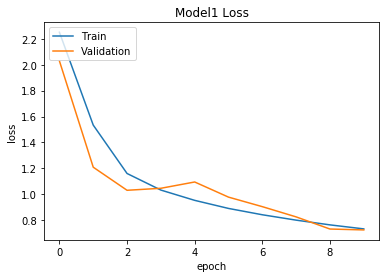

In [28]:

# summarizing history for accuracy
plt.plot(m1_history.history['acc'])
plt.plot(m1_history.history['val_acc'])
plt.title('Model1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarizing history for loss
plt.plot(m1_history.history['loss'])
plt.plot(m1_history.history['val_loss'])
plt.title('Model1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Evaluating Model1 with Test Data:

In [29]:
model1_result=model1.evaluate(X_test,y_test,verbose=1)

18000/18000 [==============================] - 5s 301us/sample - loss: 0.7909 - acc: 0.7763


In [30]:
print("Model1 Accuracy : {0}".format(model1_result[1]*100))

Model1 Accuracy : 77.63333320617676


In [31]:
print("Model1 Loss : {0}".format(model1_result[0]*100))

Model1 Loss : 79.09404906696743


#### Model1 Summary:

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,688,138
Trainable params: 3,688,138
Non-trainable params: 0
_________________________________________________________________
